# Heart Disease Prediction Model

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("heart1.csv")
data

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0
299,45,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0
300,68,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0
301,57,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0


In [5]:
data.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1


In [7]:
data.tail()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0
299,45,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0
300,68,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0
301,57,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0
302,57,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2.0,0


In [9]:
data.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,302.000000,302.000000,301.000000,301.000000,299.000000,300.000000,301.000000,300.000000,301.000000,302.000000,298.000000,301.000000,303.000000
mean,54.366337,0.682119,0.970199,131.647841,246.445183,0.147157,0.530000,149.631229,0.323333,1.046512,1.397351,0.738255,2.315615,0.544554
std,9.082101,0.466426,1.032257,17.502064,51.867342,0.354856,0.526012,22.966067,0.468530,1.161822,0.616274,1.027540,0.613777,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  301 non-null    float64
 4   chol      301 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   300 non-null    float64
 7   thalach   301 non-null    float64
 8   exang     300 non-null    float64
 9   oldpeak   301 non-null    float64
 10  slope     302 non-null    float64
 11  ca        298 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 33.3 KB


In [13]:
data.isnull().sum()

age         0
gender      1
cp          1
trestbps    2
chol        2
fbs         4
restecg     3
thalach     2
exang       3
oldpeak     2
slope       1
ca          5
thal        2
target      0
dtype: int64

In [109]:
x1 = data["gender"].mean()
x1

0.6821192052980133

In [111]:
x2 = data["cp"].mean()
x2

0.9701986754966888

In [113]:
x3 = data["trestbps"].mean()
x3

131.64784053156146

In [115]:
x4 = data["chol"].mean()
x4

246.44518272425248

In [117]:
x5 = data["fbs"].mean()
x5

0.1471571906354515

In [119]:
x6 = data["restecg"].mean()
x6

0.53

In [121]:
x7 = data["thalach"].mean()
x7

149.6312292358804

In [123]:
x8 = data["exang"].mean()
x8

0.3233333333333333

In [125]:
x9 = data["oldpeak"].mean()
x9

1.0465116279069766

In [127]:
x10 = data["slope"].mean()
x10

1.3973509933774835

In [129]:
x11 = data["ca"].mean()
x11

0.7382550335570468

In [131]:
x12 = data["thal"].mean()
x12

2.315614617940199

In [133]:
y1 = data["target"].mode()
y1

0    1
Name: target, dtype: int64

In [135]:
data["gender"].fillna(x1,inplace=True)
data["cp"].fillna(x2,inplace=True)
data["trestbps"].fillna(x3,inplace=True)
data["chol"].fillna(x4,inplace=True)
data["fbs"].fillna(x5,inplace=True)
data["restecg"].fillna(x6,inplace=True)
data["thalach"].fillna(x7,inplace=True)
data["exang"].fillna(x8,inplace=True)
data["oldpeak"].fillna(x9,inplace=True)
data["slope"].fillna(x10,inplace=True)
data["ca"].fillna(x11,inplace=True)
data["thal"].fillna(x12,inplace=True)
data["target"].fillna(y1,inplace=True)

C:\Users\intel\AppData\Local\Temp\ipykernel_2552\2762885284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["gender"].fillna(x1,inplace=True)
C:\Users\intel\AppData\Local\Temp\ipykernel_2552\2762885284.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [137]:
data.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [139]:
x = data.drop(["target"],axis=1)
x

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0
299,45,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0
300,68,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0
301,57,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0


In [157]:
y = data["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 33.3 KB


In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [163]:
X_train.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1.0,1.0,120.0,295.0,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0
202,58,1.0,0.0,150.0,270.0,0.0,0.0,111.0,1.0,0.8,2.0,0.0,3.0
196,46,1.0,2.0,150.0,231.0,0.0,1.0,147.0,0.0,3.6,1.0,0.0,2.0
75,55,0.0,1.0,135.0,250.0,0.0,0.0,161.0,0.0,1.4,1.0,0.0,2.0
176,60,1.0,0.0,117.0,230.0,1.0,1.0,160.0,1.0,1.4,2.0,2.0,3.0


In [165]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [167]:
X_test.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1.0,0.0,150.0,276.0,0.0,0.00,112.0,1.0,0.6,1.0,1.0,1.0
228,59,1.0,3.0,170.0,288.0,0.0,0.53,159.0,0.0,0.2,1.0,0.0,3.0
111,57,1.0,2.0,150.0,126.0,1.0,1.00,173.0,0.0,0.2,2.0,1.0,3.0
246,56,0.0,0.0,134.0,409.0,0.0,0.00,150.0,1.0,1.9,1.0,2.0,3.0
60,71,0.0,2.0,110.0,265.0,1.0,0.00,130.0,0.0,0.0,2.0,1.0,2.0


In [169]:
y_test.head()

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

In [171]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\intel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [173]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

AttributeError: module 'matplotlib' has no attribute 'title'

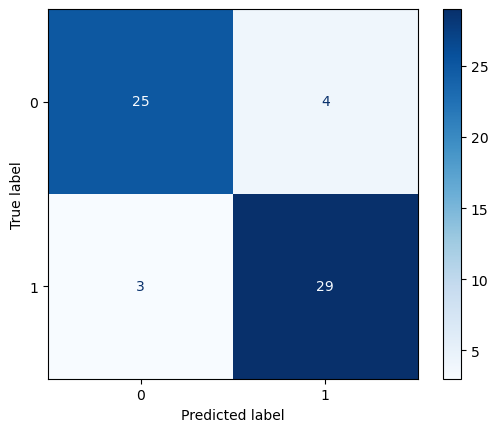

In [175]:
import matplotlib as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Change labels as needed
disp.plot(cmap=plt.cm.Blues)  # You can choose another colormap if desired


plt.title("Confusion Matrix")
plt.show()

In [177]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8852459016393442

In [179]:
import joblib

joblib.dump(model, 'heart_disease_pred.pkl')


['heart_disease_pred.pkl']

In [181]:
import joblib

# Load the model from the file
loaded_model = joblib.load('heart_disease_pred.pkl')

# Make predictions with the loaded model
y_pred = loaded_model.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
print(y_pred)


[1]


C:\Users\intel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
